In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

# Path to the dataset folder
base_dir = 'C:/Users/Asus/Kampus merdeka/MSIB/Minggu 5/chest_xray/'

# ImageDataGenerator for preprocessing the images
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [2]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[reduce_lr])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.8214 - loss: 1.3447 - val_accuracy: 0.6250 - val_loss: 32.1413 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.8958 - loss: 0.2786 - val_accuracy: 0.6250 - val_loss: 15.9952 - learning_rate: 0.0010
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 921s 6s/step - accuracy: 0.9222 - loss: 0.2230 - val_accuracy: 0.6250 - val_loss: 7.1541 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 926s 6s/step - accuracy: 0.9186 - loss: 0.2186 - val_accuracy: 0.7821 - val_loss: 0.4809 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 921s 6s/step - accuracy: 0.9361 - loss: 0.1956 - val_accuracy: 0.6731 - val_loss: 1.1167 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 929s 6s/step - accuracy: 0.9226 - loss: 0.2206 - val_accuracy: 0.7596 - val_loss: 0.4646 - learning_rate: 0.0010
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 969s 6s/step - accuracy: 0.9260 - loss: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step
[[ 64 170]
 [110 280]]
              precision    recall  f1-score   support

           0       0.37      0.27      0.31       234
           1       0.62      0.72      0.67       390

    accuracy                           0.55       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.55      0.53       624



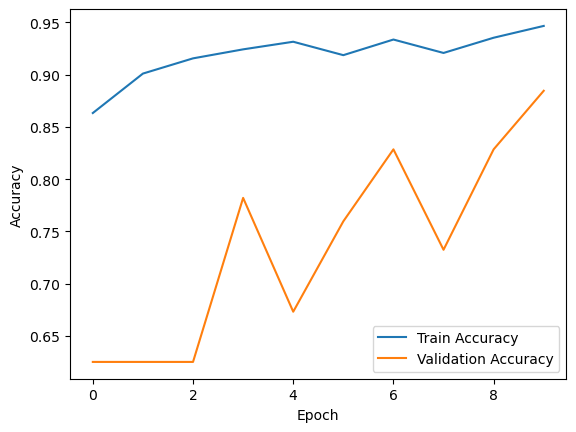

In [3]:
# Confusion matrix and classification report
test_preds = model.predict(test_generator)
test_labels = test_generator.classes
print(confusion_matrix(test_labels, test_preds.round()))
print(classification_report(test_labels, test_preds.round()))

# Visualizing accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#confusion matrix
#True Positives (TP): 280 (model memprediksi kelas 1 dengan benar).
#True Negatives (TN): 64 (model memprediksi kelas 0 dengan benar).
#False Positives (FP): 170 (model memprediksi kelas 1 padahal sebenarnya kelas 0).
#False Negatives (FN): 110 (model memprediksi kelas 0 padahal sebenarnya kelas 1).

#hasil yang didapat
#Model ini memiliki akurasi 55%, dengan performa yang lebih baik dalam 
#mendeteksi kelas 1 (pneumonia) dibandingkan kelas 0 (normal).
#Recall dan F1-score untuk kelas 1 lebih tinggi, menandakan model lebih baik dalam 
#mendeteksi kasus pneumonia daripada mendeteksi gambar paru-paru yang sehat.